# Challenge $0$


## 1. ***Data cleaning with Pandas***

Use the library `pandas` to load and clean the required dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

Obtain the data file

In [2]:
FFILE = './50_Startups.csv'
if os.path.isfile(FFILE):
    print("File already exists")
    if os.access(FFILE, os.R_OK):
        print ("File is readable")
    else:
        print ("File is not readable, removing it and downloading again")
        !rm FFILE
        !wget "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv"
else:
    print("Either the file is missing or not readable, download it")
    !wget "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv"

Either the file is missing or not readable, download it
--2024-11-08 16:07:54--  https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv
Resolving raw.github.com (raw.github.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.github.com (raw.github.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv [following]
--2024-11-08 16:07:55--  https://raw.githubusercontent.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2436 (2.4K) [text/plain]
Saving to: ‘50_Startups.csv’

50_Startups.csv     100%[====

In [3]:
import pandas as pd

# Load the dataset using Pandas
data = pd.read_csv('50_Startups.csv')

# Extracting the features (independent variables) and labels (dependent variable)
# Features (X) are taken from all columns except the last two
features = data.iloc[:, :-2].values

# Labels (y) are taken from the third column (index 3, considering the 0-based index in Python)
labels = data.iloc[:, 3].values

df = pd.DataFrame(data)

In [4]:
# Estrarre X e y (features e target)
X = df.iloc[:, :-1].values  # Tutte le colonne tranne l'ultima
y = df.iloc[:, -1].values   # Colonna 'Profit' come target


***Play with data***

In [5]:
df.shape

(50, 5)

In [6]:
# Sostituisci solo nelle colonne numeriche
numeric_cols = df.select_dtypes(include=[np.number]).columns  # Seleziona solo le colonne numeriche
df[numeric_cols] = df[numeric_cols].replace(0, df[numeric_cols].mean())


 **`df.replace()` function:**
   - This function is used to replace specific values within a DataFrame (`df`) with another value.
   - The parameters used are:
     - `to_replace=0.00`: This specifies the value in the DataFrame that needs to be replaced, in this case, `0.00`.
     - `value=df.mean(axis=0)`: This sets the replacement value for the matched condition. Here, `df.mean(axis=0)` calculates the mean for each column along the rows (axis=0) of the DataFrame `df`. The mean value for each column will replace the `0.00` values.
     - `inplace=True`: This parameter ensures that the modification is done directly on the original DataFrame (`df`) without creating a new DataFrame. If `inplace` is set to `True`, the original DataFrame is modified.

***Select two categories for binary classification***



In [7]:
df_sel=df[(df.State=="California") | (df.State=="Florida")]

In [8]:
df_sel.head() # column title and first rows of the dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
4,142107.34,91391.77,366168.42,Florida,166187.94
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60


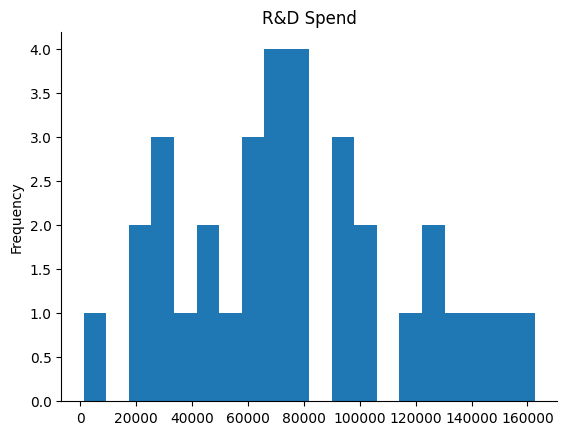

In [9]:
# @title R&D Spend

from matplotlib import pyplot as plt
df_sel['R&D Spend'].plot(kind='hist', bins=20, title='R&D Spend')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
df_sel.dtypes # type of each column

,0
R&D Spend,float64
Administration,float64
Marketing Spend,float64
State,object
Profit,float64


***Encode categorical data***

One-hot encoding of categorical feature _State_

One-Hot Encoding is a technique used in machine learning to handle categorical variables by transforming them into a format that can be easily utilized by algorithms.

Imagine having a categorical variable, such as colors: red, green, and blue. With One-Hot Encoding, each color becomes a new binary column. If an observation has a specific color, the column corresponding to that color will be set to 1, while the other columns will be set to 0.

For example:
- If you have categories "red", "green", "blue", and you want to encode them using One-Hot Encoding:
  - "red" becomes [1, 0, 0]
  - "green" becomes [0, 1, 0]
  - "blue" becomes [0, 0, 1]

This helps machine learning algorithms to understand and work with these categorical variables more effectively, as it doesn't impose an order or hierarchy among the categories but rather represents them in a form that the algorithm can interpret more efficiently.

In [11]:
df_one = pd.get_dummies(df_sel["State"])

In [12]:
df_one.head()

,California,Florida
1,True,False
2,False,True
4,False,True
6,True,False
7,False,True


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('California').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Florida').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Florida'].value_counts()
    for x_label, grp in _df_2.groupby('California')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('California')
_ = plt.ylabel('Florida')

In [13]:
# construct the final dataset that you will use for learning and prediction
df_fin = pd.concat((df_one, df_sel), axis=1)
df_fin = df_fin.drop(["Florida"], axis=1)
df_fin = df_fin.drop(["State"], axis=1)
# California is class 1, Florida is class 0
df_fin = df_fin.rename(columns={"California": "State"})
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,True,162597.70,151377.59,443898.53,191792.06
2,False,153441.51,101145.55,407934.54,191050.39
4,False,142107.34,91391.77,366168.42,166187.94
6,True,134615.46,147198.87,127716.82,156122.51
7,False,130298.13,145530.06,323876.68,155752.60


from matplotlib import pyplot as plt
_df_3['R&D Spend'].plot(kind='hist', bins=20, title='R&D Spend')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Administration'].plot(kind='hist', bins=20, title='Administration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Marketing Spend'].plot(kind='hist', bins=20, title='Marketing Spend')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Profit'].plot(kind='hist', bins=20, title='Profit')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('State').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='R&D Spend', y='Administration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Administration', y='Marketing Spend', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Marketing Spend', y='Profit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['R&D Spend'].plot(kind='line', figsize=(8, 4), title='R&D Spend')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Administration'].plot(kind='line', figsize=(8, 4), title='Administration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Marketing Spend'].plot(kind='line', figsize=(8, 4), title='Marketing Spend')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Profit'].plot(kind='line', figsize=(8, 4), title='Profit')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='R&D Spend', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='Administration', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Marketing Spend', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Profit', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [14]:
# Constructing the final dataset for learning and prediction

# Concatenating two DataFrames 'df_one' and 'df_sel' along columns (axis=1)
df_fin = pd.concat((df_one, df_sel), axis=1)

# Dropping the column "Florida" from the dataset as it was not selected for the final model
df_fin = df_fin.drop(["Florida"], axis=1)

# Dropping the column "State" (assumed to be the original 'State' column) as it is not required in its original form
df_fin = df_fin.drop(["State"], axis=1)

# Renaming the column "California" to "State" as part of preparing the dataset for classification (1 for California, 0 for Florida)
df_fin = df_fin.rename(columns={"California": "State"})

# Displaying the initial rows of the modified final dataset
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,True,162597.70,151377.59,443898.53,191792.06
2,False,153441.51,101145.55,407934.54,191050.39
4,False,142107.34,91391.77,366168.42,166187.94
6,True,134615.46,147198.87,127716.82,156122.51
7,False,130298.13,145530.06,323876.68,155752.60


from matplotlib import pyplot as plt
_df_19['R&D Spend'].plot(kind='hist', bins=20, title='R&D Spend')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Administration'].plot(kind='hist', bins=20, title='Administration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21['Marketing Spend'].plot(kind='hist', bins=20, title='Marketing Spend')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22['Profit'].plot(kind='hist', bins=20, title='Profit')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_23.groupby('State').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24.plot(kind='scatter', x='R&D Spend', y='Administration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25.plot(kind='scatter', x='Administration', y='Marketing Spend', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='Marketing Spend', y='Profit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27['R&D Spend'].plot(kind='line', figsize=(8, 4), title='R&D Spend')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_28['Administration'].plot(kind='line', figsize=(8, 4), title='Administration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['Marketing Spend'].plot(kind='line', figsize=(8, 4), title='Marketing Spend')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['Profit'].plot(kind='line', figsize=(8, 4), title='Profit')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_31['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_31, x='R&D Spend', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_32['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_32, x='Administration', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_33['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_33, x='Marketing Spend', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_34['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_34, x='Profit', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

***Normalize***

Divide by the absolute value of the maximum so that features are in \[0, 1\]

In [15]:
# Function to normalize each column by dividing by the absolute maximum value
def absolute_maximum_scale(series):
    # Check if the series data type is boolean
    if series.dtype == bool:
        # If boolean, return the series as is (no normalization needed)
        return series
    else:
        # If not boolean, perform the normalization
        return series / series.abs().max()

# Apply the normalization to each column in df_fin
for col in df_fin.columns:
    df_fin[col] = absolute_maximum_scale(df_fin[col])

# Display the first few rows of the normalized DataFrame
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,True,1.000000,0.828805,1.000000,1.000000
2,False,0.943688,0.553781,0.918982,0.996133
4,False,0.873981,0.500378,0.824892,0.866501
6,True,0.827905,0.805926,0.287716,0.814020
7,False,0.801353,0.796789,0.729619,0.812091


In [16]:
def absolute_maximum_scale(series):
    """
    Scale each column in the DataFrame 'df_fin' by dividing the values by the absolute maximum value of that column.

    Args:
    series: A pandas Series or DataFrame column to be scaled.

    Returns:
    A scaled version of the input series with values ranging from -1 to 1 based on the maximum absolute value in the column.
    """
    return series / series.abs().max()

In [17]:
def absolute_maximum_scale(series):
# Check if the series data type is boolean or an object (often representing string/categorical data)
    if series.dtype == bool or series.dtype == object:
        # If boolean or object, return the series as is (no normalization needed)
        return series
    else:
        # If not boolean or object, perform the normalization
        return series / series.abs().max()



In [18]:
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,True,1.000000,0.828805,1.000000,1.000000
2,False,0.943688,0.553781,0.918982,0.996133
4,False,0.873981,0.500378,0.824892,0.866501
6,True,0.827905,0.805926,0.287716,0.814020
7,False,0.801353,0.796789,0.729619,0.812091


In [19]:
df_fin.shape

(33, 5)

***Classification***

Prepare the dataset:

In [20]:
y = df_fin["State"] # ground truth labels
X = df_fin.drop(["State"], axis=1) # datapoints features
# extract actual values from series
y = y.values
X = X.values

Train test split

$75\%$ of the data are in the training set, the remaining $25\%$ constitutes the test set.

In [21]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# X represents the features (independent variables), and y represents the target (dependent variable).

# Using train_test_split function to create the training and testing sets
# X_train and y_train: Training features and labels
# X_test and y_test: Testing features and labels

# The 'test_size=0.25' parameter sets the proportion of the dataset to include in the test split. Here, 25% of the data is allocated to the test set.
# The 'random_state=0' parameter sets the random seed for reproducibility of the split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


Train the Logistic Regression Model

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
# Creating a Logistic Regression model with specific parameters
# - 'random_state=0' ensures reproducibility by setting the random seed.
# - 'solver='lbfgs'' selects the optimization algorithm for the logistic regression.

LR = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)

# Predicting the target variable (y) using the Logistic Regression model on the test set (X_test).
predictions = LR.predict(X_test)

# Calculating and rounding the accuracy score of the Logistic Regression model on the test set.
# The score is calculated by comparing the predicted values to the actual values (y_test).
accuracy = round(LR.score(X_test, y_test), 4)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.3333


***Plot results***

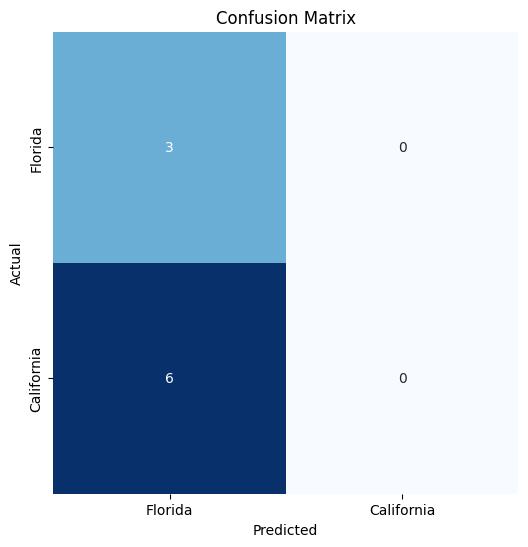

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already executed the code provided and have 'y_test' and 'predictions'

# Create a confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Florida', 'California'],
            yticklabels=['Florida', 'California'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

***Add regularization***

Implement from scratch the regularized logistic regression model (with all the regularization techniques seen during the course).

In [25]:
# Regularized Logistic Regression with L2 regularization (Ridge)
LR_ridge = LogisticRegression(penalty='l2', random_state=0, solver='lbfgs')
LR_ridge.fit(X_train, y_train)
accuracy_ridge = round(LR_ridge.score(X_test, y_test), 4)
print(f"Accuracy with L2 regularization (Ridge): {accuracy_ridge}")

# Regularized Logistic Regression with L1 regularization (Lasso)
LR_lasso = LogisticRegression(penalty='l1', random_state=0, solver='liblinear')
LR_lasso.fit(X_train, y_train)
accuracy_lasso = round(LR_lasso.score(X_test, y_test), 4)
print(f"Accuracy with L1 regularization (Lasso): {accuracy_lasso}")


Accuracy with L2 regularization (Ridge): 0.3333
Accuracy with L1 regularization (Lasso): 0.3333


***Model assessment***

Given true and predicted values, compute the most common classification metrics to assess the quality of your predictions.

In [26]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred = LR.predict(X_test)
target_names = ['California', 'Florida']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  California       0.33      1.00      0.50         3
     Florida       0.00      0.00      0.00         6

    accuracy                           0.33         9
   macro avg       0.17      0.50      0.25         9
weighted avg       0.11      0.33      0.17         9



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Repeat the previous task for regularized logistic regression and compare the results.

In [27]:
from sklearn.metrics import classification_report

# Evaluate the basic Logistic Regression model
print("Classification report for the basic Logistic Regression model:")
print(classification_report(y_test, predictions, target_names=['California', 'Florida']))

# Evaluate the Logistic Regression model with L2 regularization
predictions_ridge = LR_ridge.predict(X_test)
print("\nClassification report for Logistic Regression with L2 regularization:")
print(classification_report(y_test, predictions_ridge, target_names=['California', 'Florida']))

# Evaluate the Logistic Regression model with L1 regularization
predictions_lasso = LR_lasso.predict(X_test)
print("\nClassification report for Logistic Regression with L1 regularization:")
print(classification_report(y_test, predictions_lasso, target_names=['California', 'Florida']))


Classification report for the basic Logistic Regression model:
              precision    recall  f1-score   support

  California       0.33      1.00      0.50         3
     Florida       0.00      0.00      0.00         6

    accuracy                           0.33         9
   macro avg       0.17      0.50      0.25         9
weighted avg       0.11      0.33      0.17         9


Classification report for Logistic Regression with L2 regularization:
              precision    recall  f1-score   support

  California       0.33      1.00      0.50         3
     Florida       0.00      0.00      0.00         6

    accuracy                           0.33         9
   macro avg       0.17      0.50      0.25         9
weighted avg       0.11      0.33      0.17         9


Classification report for Logistic Regression with L1 regularization:
              precision    recall  f1-score   support

  California       0.33      1.00      0.50         3
     Florida       0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

***ROC curve***

Implement a function for producing the Receiver Operating Characteristic (ROC) curve.

Given true and predicted values, plot the ROC curve using your implemented function.

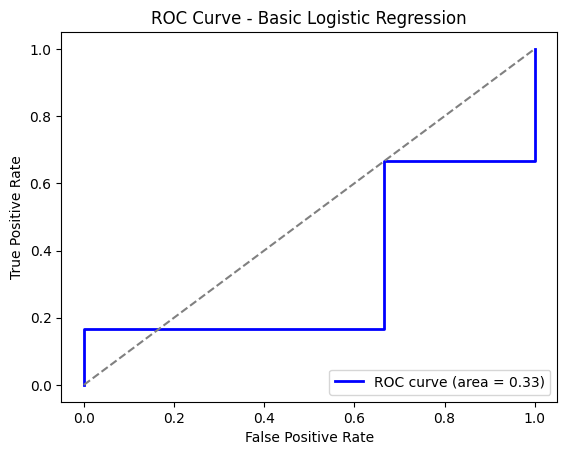

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot the ROC curve
def plot_roc_curve(y_true, y_scores, label):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {label}')
    plt.legend(loc="lower right")
    plt.show()

# Predicted probabilities for the basic model
y_scores = LR.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_scores, "Basic Logistic Regression")
